In [1]:
import pandas as pd

# Lendo o dataset de componentes curriculares
componentes = pd.read_csv('componentes-curriculares-presenciais.csv', sep=';')
componentes.head()

,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,ch_total,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
0,18642,DISCIPLINA,MUT721,T,LABORATÓRIOS ELETIVOS,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
1,18643,DISCIPLINA,MUT508,T,COMPOSIÇÃO EM MÚSICA POPULAR III,ESCOLA DE MÚSICA,60,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
2,18644,DISCIPLINA,MUT516,T,CO-REPETIÇÃO,ESCOLA DE MÚSICA,30,0,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
3,18645,DISCIPLINA,MUT520,T,CONTRABAIXO ACÚSTICO I,ESCOLA DE MÚSICA,30,0,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
4,18646,DISCIPLINA,MUT165,T,PIANO COMPLEMENTAR I,ESCOLA DE MÚSICA,15,0,0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN


In [2]:
turmas = list()
# Lendo os datasets de todas as turmas de 2013.1 à 2017.2
for i in range(3, 8):
    str_dataset_1 = 'turmas-201' + str(i) +'.1.csv'
    str_dataset_2 = 'turmas-201' + str(i) +'.2.csv'
    turmas.append(pd.read_csv(str_dataset_1, sep=';'))
    turmas.append(pd.read_csv(str_dataset_2, sep=';'))
    
turmas_total = pd.concat(turmas)
turmas_total.columns


Index(['id_turma', 'codigo_turma', 'id_docente_interno', 'id_docente_externo',
       'observacao', 'id_componente_curricular', 'nivel_ensino',
       'campus_turma', 'local', 'ano', 'periodo', 'data_inicio', 'data_fim',
       'descricao_horario', 'total_solicitacoes', 'capacidade_aluno', 'tipo',
       'distancia', 'data_consolidacao', 'agrupadora', 'id_turma_agrupadora',
       'qtd_aulas_lancadas', 'situacao_turma', 'convenio',
       'modalidade_participantes', 'Unnamed: 25'],
      dtype='object')

In [3]:
alunos = list()

# Lendo os datasets de matriculas de alunos nas turmas de 2013.1 à 2017.2
for i in range(3, 8):
    str_dataset_1 = 'matriculas-de-201' + str(i) +'.1.csv'
    str_dataset_2 = 'matriculas-de-201' + str(i) +'.2.csv'
    alunos.append(pd.read_csv(str_dataset_1, sep=';'))
    alunos.append(pd.read_csv(str_dataset_2, sep=';'))
    
alunos_total = pd.concat(alunos)
alunos_total.columns


Index(['Unnamed: 10', 'descricao', 'discente', 'faltas_unidade', 'id_curso',
       'id_turma', 'media_final', 'nota', 'numero_total_faltas', 'reposicao',
       'unidade'],
      dtype='object')

In [4]:
imd_unidade = 'INSTITUTO METROPOLE DIGITAL'
dim_unidade = 'DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA'
prob_nome = 'PROBABILIDADE'
fmc1_nome = 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I'
fmc2_nome = 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II'

# Filtrando os id's das turmas de probabilidade, fmc1 e fmc2
id_comp_prob = list(componentes[(componentes.nome == prob_nome) & ((componentes.unidade_responsavel == imd_unidade) | (componentes.unidade_responsavel == dim_unidade))]['id_componente'])
id_comp_fmc1 = list(componentes[(componentes.nome == fmc1_nome) & ((componentes.unidade_responsavel == imd_unidade) | (componentes.unidade_responsavel == dim_unidade))]['id_componente'])
id_comp_fmc2 = list(componentes[(componentes.nome == fmc2_nome) & ((componentes.unidade_responsavel == imd_unidade) | (componentes.unidade_responsavel == dim_unidade))]['id_componente'])
id_comp_fmc2

[55025, 64788]

In [5]:
turmas_prob = list()
turmas_fmc1 = list()
turmas_fmc2 = list()

# Utilizando dos id's das turmas para colher os dados sobre as turmas
for id_prob in id_comp_prob:
    turmas_prob.append(turmas_total[(turmas_total.id_componente_curricular == id_prob) & (turmas_total.situacao_turma == 'CONSOLIDADA')])

for id_fmc1 in id_comp_fmc1:
    turmas_fmc1.append(turmas_total[(turmas_total.id_componente_curricular == id_fmc1) & (turmas_total.situacao_turma == 'CONSOLIDADA')])

for id_fmc2 in id_comp_fmc2:
    turmas_fmc2.append(turmas_total[(turmas_total.id_componente_curricular == id_fmc2) & (turmas_total.situacao_turma == 'CONSOLIDADA')])
    
turmas_prob = list(int(i) for i in pd.concat(turmas_prob)['id_turma'].unique())
turmas_fmc1 = list(int(i) for i in pd.concat(turmas_fmc1)['id_turma'].unique())
turmas_fmc2 = list(int(i) for i in pd.concat(turmas_fmc2)['id_turma'].unique())

turmas_fmc2

[1217967,
 1228411,
 1228412,
 1239537,
 1239541,
 57564855,
 57564858,
 57576738,
 57579587,
 57579588,
 57586396,
 57586397,
 57597922,
 57597928]

In [6]:
alunos_prob = list()
alunos_fmc1 = list()
alunos_fmc2 = list()

for id_turma_prob in turmas_prob:
    alunos_prob.append(alunos_total[alunos_total.id_turma == id_turma_prob])

for id_turma_fmc1 in turmas_fmc1:
    alunos_fmc1.append(alunos_total[alunos_total.id_turma == id_turma_fmc1])

for id_turma_fmc2 in turmas_fmc2:
    alunos_fmc2.append(alunos_total[alunos_total.id_turma == id_turma_fmc2])
    
alunos_prob = pd.concat(alunos_prob)
alunos_prob = alunos_prob[alunos_prob['media_final'].notnull()]

alunos_fmc1 = pd.concat(alunos_fmc1)
alunos_fmc1 = alunos_fmc1[alunos_fmc1['media_final'].notnull()]

alunos_fmc2 = pd.concat(alunos_fmc2)
alunos_fmc2 = alunos_fmc2[alunos_fmc2['media_final'].notnull()]
alunos_fmc2.head()

,Unnamed: 10,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
136427,NaN,APROVADO POR NOTA,00bd67a601192f51da746e41e60815c7,0.0,92127264.0,1217967,5.0,5.5,6.0,f,1.0
136428,NaN,APROVADO POR NOTA,00bd67a601192f51da746e41e60815c7,0.0,92127264.0,1217967,5.0,5.0,6.0,f,2.0
136429,NaN,APROVADO POR NOTA,00bd67a601192f51da746e41e60815c7,0.0,92127264.0,1217967,5.0,4.5,6.0,f,3.0
136430,NaN,APROVADO,fdf1f636486a3ad1d7bd6cc303c6c32a,0.0,92127264.0,1217967,7.1,5.0,0.0,f,1.0
136431,NaN,APROVADO,fdf1f636486a3ad1d7bd6cc303c6c32a,0.0,92127264.0,1217967,7.1,8.2,0.0,f,2.0


In [7]:
# Separando em unidades
un1_prob = alunos_prob[alunos_prob.unidade == 1]
un2_prob = alunos_prob[alunos_prob.unidade == 2]
un3_prob = alunos_prob[alunos_prob.unidade == 3]

un1_fmc1 = alunos_fmc1[alunos_fmc1.unidade == 1]
un2_fmc1 = alunos_fmc1[alunos_fmc1.unidade == 2]
un3_fmc1 = alunos_fmc1[alunos_fmc1.unidade == 3]

un1_fmc2 = alunos_fmc2[alunos_fmc2.unidade == 1]
un2_fmc2 = alunos_fmc2[alunos_fmc2.unidade == 2]
un3_fmc2 = alunos_fmc2[alunos_fmc2.unidade == 3]
un3_fmc2.head()

,Unnamed: 10,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
136429,NaN,APROVADO POR NOTA,00bd67a601192f51da746e41e60815c7,0.0,92127264.0,1217967,5.0,4.5,6.0,f,3.0
136432,NaN,APROVADO,fdf1f636486a3ad1d7bd6cc303c6c32a,0.0,92127264.0,1217967,7.1,8.2,0.0,f,3.0
136435,NaN,REPROVADO,876c9810d6f4b25797d73c942f55764e,0.0,92127264.0,1217967,0.3,0.0,4.0,f,3.0
136436,NaN,REPROVADO,d624069cd2691821d497421eae79b0bc,0.0,92127264.0,1217967,4.6,5.5,25.0,f,3.0
136441,NaN,REPROVADO,da437177e090ab90ea33ba772cfbae03,0.0,92127264.0,1217967,3.9,6.7,6.0,f,3.0


In [8]:
# Calculando as medias das unidades e a final
media_un1_prob = un1_prob['nota'].mean()
media_un2_prob = un2_prob['nota'].mean()
media_un3_prob = un3_prob['nota'].mean()
media_final_prob = alunos_prob['media_final'].mean()

media_un1_fmc1 = un1_fmc1['nota'].mean()
media_un2_fmc1 = un2_fmc1['nota'].mean()
media_un3_fmc1 = un3_fmc1['nota'].mean()
media_final_fmc1 = alunos_fmc1['media_final'].mean()

media_un1_fmc2 = un1_fmc2['nota'].mean()
media_un2_fmc2 = un2_fmc2['nota'].mean()
media_un3_fmc2 = un3_fmc2['nota'].mean()
media_final_fmc2 = alunos_fmc2['media_final'].mean()
media_final_fmc2

2.8291448516579423

In [9]:
# Calculando os desvios padroes
std_un1_prob = un1_prob['nota'].std()
std_un2_prob = un2_prob['nota'].std()
std_un3_prob = un3_prob['nota'].std()
std_final_prob = alunos_prob['media_final'].std()

std_un1_fmc1 = un1_fmc1['nota'].std()
std_un2_fmc1 = un2_fmc1['nota'].std()
std_un3_fmc1 = un3_fmc1['nota'].std()
std_final_fmc1 = alunos_fmc1['media_final'].std()

std_un1_fmc2 = un1_fmc2['nota'].std()
std_un2_fmc2 = un2_fmc2['nota'].std()
std_un3_fmc2 = un3_fmc2['nota'].std()
std_final_fmc2 = alunos_fmc2['media_final'].std()

print("Prob - Un1:", std_un1_prob,"Un2:", std_un2_prob,"Un3:", std_un3_prob, "MF:", std_final_prob)
print("FMC I - Un1:", std_un1_fmc1,"Un2:", std_un2_fmc1,"Un3:", std_un3_fmc1, "MF:", std_final_fmc2)
print("FMC II - Un1:", std_un1_fmc2,"Un2:", std_un2_fmc2,"Un3:", std_un3_fmc2, "MF:", std_final_fmc2)

Prob - Un1: 2.58815820705765 Un2: 3.123317074007574 Un3: 3.0684381478360176 MF: 2.5496384262202607
FMC I - Un1: 2.8573091359376557 Un2: 2.9520992286383514 Un3: 2.8724361339486966 MF: 2.6736272731353186
FMC II - Un1: 2.5632659825376733 Un2: 2.8835102579641045 Un3: 2.990121136402086 MF: 2.6736272731353186


In [12]:
# Definindo os marcadores
un1_prob_markers = [media_un1_prob - 2*std_un1_prob, media_un1_prob - std_un1_prob,
                   media_un1_prob + std_un1_prob, media_un1_prob + 2*std_un1_prob]
un1_prob_markers =[int(i) for i in un1_prob_markers]

un2_prob_markers = [media_un2_prob - 2*std_un2_prob, media_un2_prob - std_un2_prob,
                   media_un2_prob + std_un2_prob, media_un2_prob + 2*std_un2_prob]
un2_prob_markers =[int(i) for i in un2_prob_markers]

un3_prob_markers = [media_un3_prob - 2*std_un3_prob, media_un3_prob - std_un3_prob,
                   media_un3_prob + std_un3_prob, media_un3_prob + 2*std_un3_prob]
un3_prob_markers =[int(i) for i in un3_prob_markers]

mf_prob_markers = [media_final_prob - 2*std_final_prob, media_final_prob - std_final_prob,
                   media_final_prob + std_final_prob, media_final_prob + 2*std_final_prob]
mf_prob_markers =[int(i) for i in mf_prob_markers]

un1_fmc1_markers = [media_un1_fmc1 - 2*std_un1_fmc1, media_un1_fmc1 - std_un1_fmc1,
                   media_un1_fmc1 + std_un1_fmc1, media_un1_fmc1 + 2*std_un1_fmc1]
un1_fmc1_markers =[int(i) for i in un1_fmc1_markers]

un2_fmc1_markers = [media_un2_fmc1 - 2*std_un2_fmc1, media_un2_fmc1 - std_un2_fmc1,
                   media_un2_fmc1 + std_un2_fmc1, media_un2_fmc1 + 2*std_un2_fmc1]
un2_fmc1_markers =[int(i) for i in un2_fmc1_markers]

un3_fmc1_markers = [media_un3_fmc1 - 2*std_un3_fmc1, media_un3_fmc1 - std_un3_fmc1,
                   media_un3_fmc1 + std_un3_fmc1, media_un3_fmc1 + 2*std_un3_fmc1]
un3_fmc1_markers =[int(i) for i in un3_fmc1_markers]

mf_fmc1_markers = [media_final_fmc1 - 2*std_final_fmc1, media_final_fmc1 - std_final_fmc1,
                   media_final_fmc1 + std_final_fmc1, media_final_fmc1 + 2*std_final_fmc1]
mf_fmc1_markers =[int(i) for i in mf_fmc1_markers]


un1_fmc2_markers = [media_un1_fmc2 - 2*std_un1_fmc2, media_un1_fmc2 - std_un1_fmc2,
                   media_un1_fmc2 + std_un1_fmc2, media_un1_fmc2 + 2*std_un1_fmc2]
un1_fmc2_markers =[int(i) for i in un1_fmc2_markers]

un2_fmc2_markers = [media_un2_fmc2 - 2*std_un2_fmc2, media_un2_fmc2 - std_un2_fmc2,
                   media_un2_fmc2 + std_un2_fmc2, media_un2_fmc2 + 2*std_un2_fmc2]
un2_fmc2_markers =[int(i) for i in un2_fmc2_markers]

un3_fmc2_markers = [media_un3_fmc2 - 2*std_un3_fmc2, media_un3_fmc2 - std_un3_fmc2,
                   media_un3_fmc2 + std_un3_fmc2, media_un3_fmc2 + 2*std_un3_fmc2]
un3_fmc2_markers =[int(i) for i in un3_fmc2_markers]

mf_fmc2_markers = [media_final_fmc2 - 2*std_final_fmc2, media_final_fmc2 - std_final_fmc2,
                   media_final_fmc2 + std_final_fmc2, media_final_fmc2 + 2*std_final_fmc2]
mf_fmc2_markers =[int(i) for i in mf_fmc2_markers]

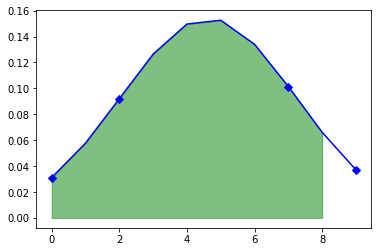

0.543703535738


In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Criando os atributos dos gráficos
eixo_x = range(0, 10)
xi = [9, 7, 5]
cdf9_un1_prob = stats.norm.cdf(xi[0], media_un1_prob, std_un1_prob)
cdf7_un1_prob = stats.norm.cdf(xi[1], media_un1_prob, std_un1_prob)
cdf5_un1_prob = stats.norm.cdf(xi[2], media_un1_prob, std_un1_prob)

cdf9_un2_prob = stats.norm.cdf(xi[0], media_un2_prob, std_un2_prob)
cdf7_un2_prob = stats.norm.cdf(xi[1], media_un2_prob, std_un2_prob)
cdf5_un2_prob = stats.norm.cdf(xi[2], media_un2_prob, std_un2_prob)

cdf9_un3_prob = stats.norm.cdf(xi[0], media_un3_prob, std_un3_prob)
cdf7_un3_prob = stats.norm.cdf(xi[1], media_un3_prob, std_un3_prob)
cdf5_un3_prob = stats.norm.cdf(xi[2], media_un3_prob, std_un3_prob)

cdf9_mf_prob = stats.norm.cdf(xi[0], media_final_prob, std_final_prob)
cdf7_mf_prob = stats.norm.cdf(xi[1], media_final_prob, std_final_prob)
cdf5_mf_prob = stats.norm.cdf(xi[2], media_final_prob, std_final_prob)

pdf_un1_prob = stats.norm.pdf(eixo_x, media_un1_prob, std_un1_prob)

pdf_un2_prob = stats.norm.pdf(eixo_x, media_un2_prob, std_un2_prob)

pdf_un3_prob = stats.norm.pdf(eixo_x, media_un3_prob, std_un3_prob)

pdf_mf_prob = stats.norm.pdf(eixo_x, media_final_prob, std_final_prob)

plt.plot(eixo_x, pdf_un1_prob, '-bD',markevery=un1_prob_markers)

plt.fill_between(eixo_x[0:xi[0]], pdf_un1_prob[0:xi[0]],color='g',alpha=.5)

plt.show()

print(cdf5_mf_prob)